In [1]:
# imports

import sys
import os

import pandas as pd

import grblc

from grblc.evolution.lightcurve import Lightcurve

In [2]:
# run this the first time you use grblc to download SFD maps

# import grblc.convert.sfd
# grblc.convert.sfd.fetch()

In [3]:
# # convert to AB system and correct for extinction

# import grblc.convert as cv

# info = pd.read_csv('data/grblist.csv', sep=',', index_col='grb')

# grb = '970228A'

# cv.correctGRB(grb = grb,
#             ra = info.loc[grb, 'ra'],
#             dec = info.loc[grb, 'dec'],
#             path = 'converted/970228A_magAB_extcorr.txt',
#             save_in_folder = 'converted/',
#             debug = False
#             )

In [4]:
grb = '120422A'

lc = Lightcurve(path = 'data/'+grb+'_magAB_extcorr.txt',
                #data_space= 'lin',
                name = grb)
lc.displayGRB()

   time_sec        mag  mag_err   band band_appx system        telescope  \
1  2.252853  20.232832    0.270  white     white     AB  NGSO/Swift/UVOT   
2  2.587935  21.060000    0.430      U         U     AB  NGSO/Swift/UVOT   
7  2.969416  20.352832    0.290  white     white     AB  NGSO/Swift/UVOT   
8  2.971229  20.840000    0.595   UVM2      UVM2     AB  NGSO/Swift/UVOT   
9  3.045401  20.300000    0.455   UVW2      UVW2     AB  NGSO/Swift/UVOT   

  extcorr          source flag  
1       y           13248   no  
2       y  arXiv1401.3774   no  
7       y           13248   no  
8       y  arXiv1401.3774   no  
9       y  arXiv1401.3774   no  


120422A
-------
band_appx
i        58
r        46
g        26
z        21
R        12
J        10
I         8
V         6
H         6
U         5
B         4
white     3
UVW1      3
UVM2      3
UVW2      2
Y         1
K         1
Name: count, dtype: int64

 The filter chosen in this GRB:  i , with 58 occurrences.
This filter will be considered for rescaling
Individual point rescaling:
    band  Occur_band  Log10(t)  Resc_fact  Resc_fact_err  Resc_fact_weights
0      I           8  0.673149  -0.180000       0.196977           5.076731
1      g          26  0.678971  -0.200000       0.205913           4.856429
2      r          46  0.678971  -0.180000       0.228035           4.385290
3      z          21  0.678971   0.000000       0.269072           3.716471
4      g          26  0.680363   0.010000       0.086023          11.624764
5      r          46  0.680363  -0.040000       0.098995          10.101525
6      z          21  0.681517   0.180000       0.148661           6.726728
7   

C:\Users\ridha\AppData\Local\Temp\ipykernel_18128\3783924183.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



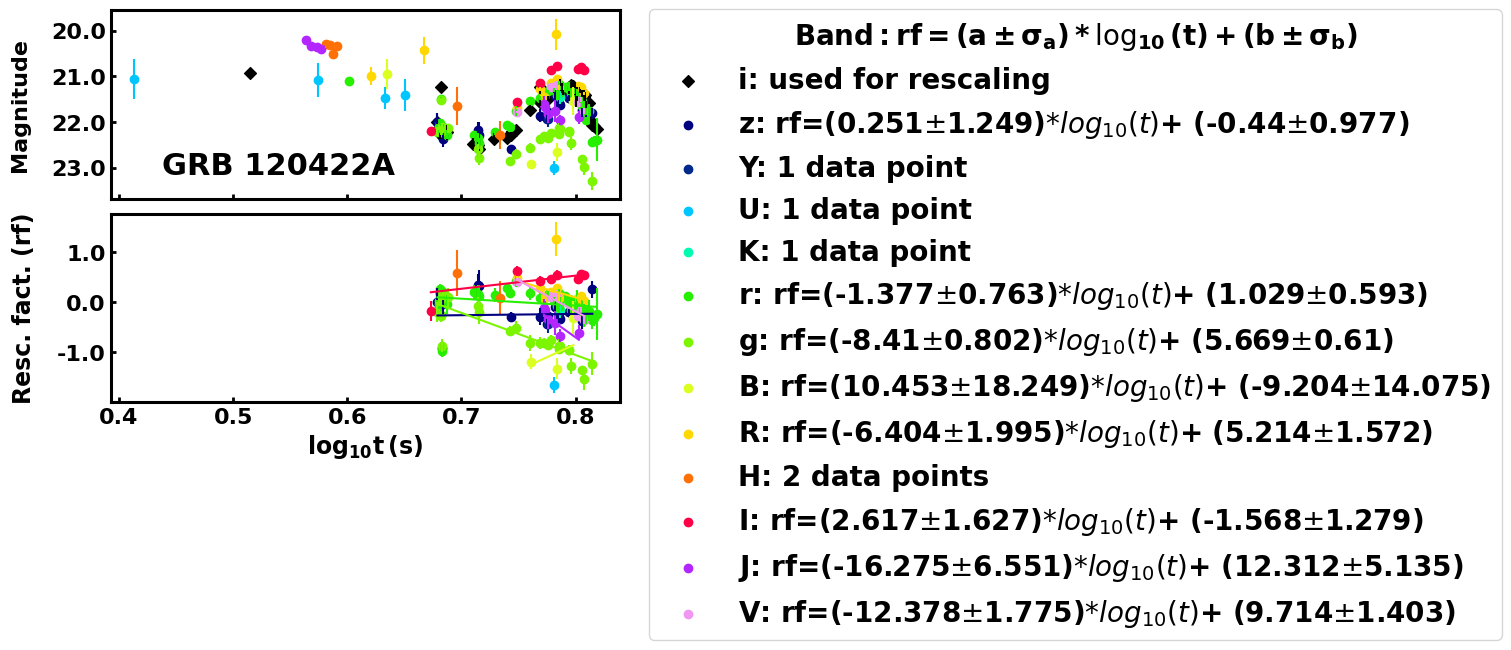

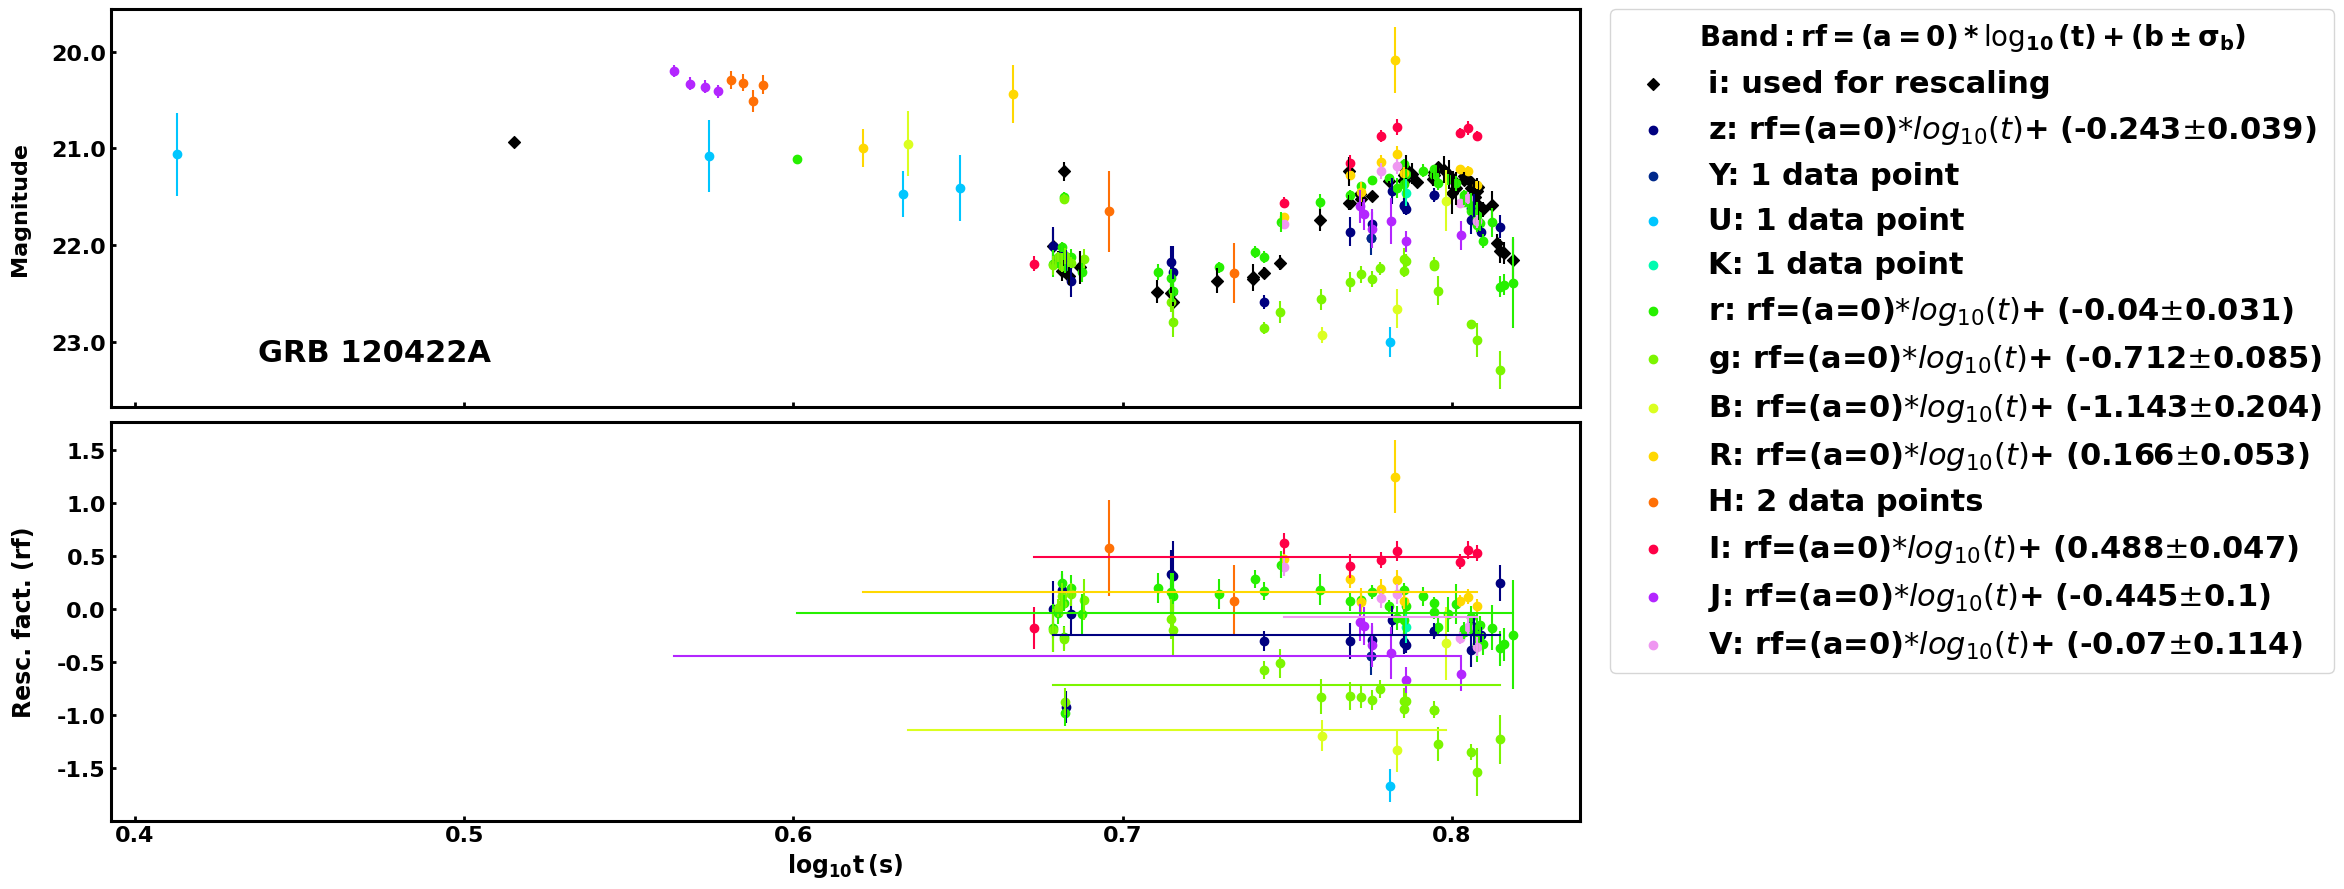

In [5]:
fig, *__ = lc.colorevolGRB(save_plot=True, save_in_folder='colorevol/')
fig.show()

In [7]:
figunresc, figresc, resc_mag_df = lc.rescaleGRB()
figunresc.show()
if figresc is not None:
    figresc.show()

Filters with no colour evolution:

[]
No filters to rescale.


In [1]:
import os
import pandas as pd

path="D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/"
grblist = []
filelist = []
for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root,file))
        names = file.split('_')
        grblist.append(names[0])
filedf=pd.DataFrame()
filedf.index = grblist
filedf['path'] = filelist

print(filedf.head())
radec = pd.read_csv('radec.csv', index_col='grb')
print(radec.head())

                                                      path
000131A  D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/0...
000301C  D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/0...
000418A  D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/0...
000911A  D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/0...
000926A  D:/naoj-grb/sample/mag-AB-extcorr-30-05-2023/0...
                ra         dec coorderr       z  \
grb                                               
970228A  05h01m57s  +11° 46.4'       3'  0.6950   
970508A  06h53m28s  +79° 17.4'       3'  0.8300   
971214A  11h56m30s  +65° 12.0'       4'  3.4200   
980329A  07h02m41s  +38° 50.7'       3'  3.5000   
980425A  19h34m54s  -52° 49.9'       8'  0.0085   

                                                 path  
grb                                                    
970228A  D:/grb/sample/mag-30-05-2023/970228A_mag.txt  
970508A  D:/grb/sample/mag-30-05-2023/970508A_mag.txt  
971214A  D:/grb/sample/mag-30-05-2023/971214A_mag.txt  
980329A 

In [2]:
import sys
from grblc.evolution.sed import beta_marquardt

grb = "090510A"
path = filedf.loc[grb, 'path']
redshift = radec.loc[grb, 'z']

beta_marquardt(grb=grb, filename=path, z=redshift)

GRB =  090510A , at z = 1.6187 , host galaxy model (Pei 1992)
